<a href="https://colab.research.google.com/github/syma-afsha/AI_LAB/blob/main/syma_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [16]:
# Load the dataset
data = pd.read_csv('dataset-a.csv')
X=data.values
print("Shape of the dataset:", X.shape)


Shape of the dataset: (1430, 2)


In [17]:
X[:4]

array([[6.00609434e+01, 7.92003179e-06],
       [6.01500902e+01, 1.18811294e-05],
       [5.96097930e+01, 7.39564099e-06],
       [6.00255681e+01, 9.36751482e-06]])

In [23]:
def PCA(X,num_components):
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean


    n_samples = X.shape[0]
    covariance_matrix = (1 / n_samples) * np.dot(X_centered.T, X_centered)


    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)


    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    max_eigenvalues = eigenvalues[:num_components]
    max_eigenvectors = eigenvectors[:, :num_components]


    projected_data = np.dot(X_centered, max_eigenvectors)
    return projected_data

data_2d=PCA(X,2)
data_2d.shape


(1430, 2)

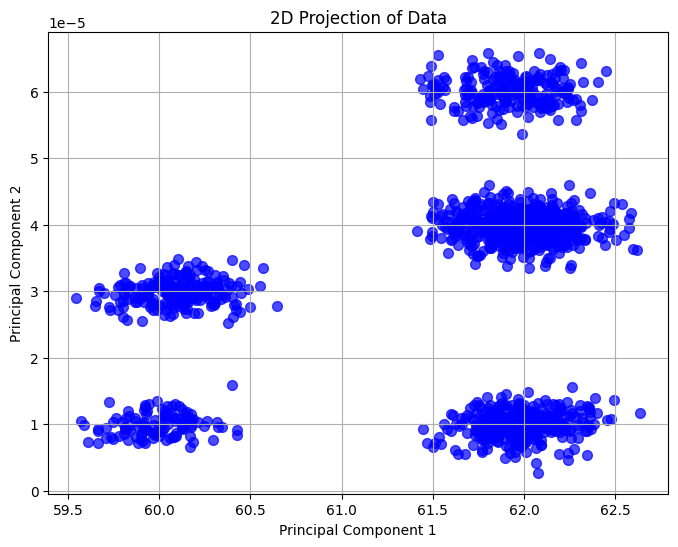

In [26]:
import matplotlib.pyplot as plt

# Plot the 2D data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', s=50, alpha=0.7)
plt.title('2D Projection of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()